In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Loading the dataset
data = pd.read_csv("data/heart_attack_prediction_dataset.csv")

In [4]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere'])

In [5]:
# Splitting the data into features and target variable
X = data.drop(columns=['Heart Attack Risk', 'Patient ID'])
y = data['Heart Attack Risk']

In [6]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initializing the k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

In [9]:
# Defining hyperparameters to tune
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [10]:
# Grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

In [11]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [12]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Accuracy: 0.6273894436519258


In [13]:
# Training the classifier with best parameters
best_knn_classifier = grid_search.best_estimator_
best_knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [14]:
# Predicting the test set results
y_pred = best_knn_classifier.predict(X_test_scaled)

In [15]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the k-Nearest Neighbors classifier:", accuracy)

Accuracy of the k-Nearest Neighbors classifier: 0.6343411294922989


In [16]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1125
           1       0.37      0.03      0.06       628

    accuracy                           0.63      1753
   macro avg       0.51      0.50      0.41      1753
weighted avg       0.55      0.63      0.52      1753



In [17]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1093,   32],
       [ 609,   19]])

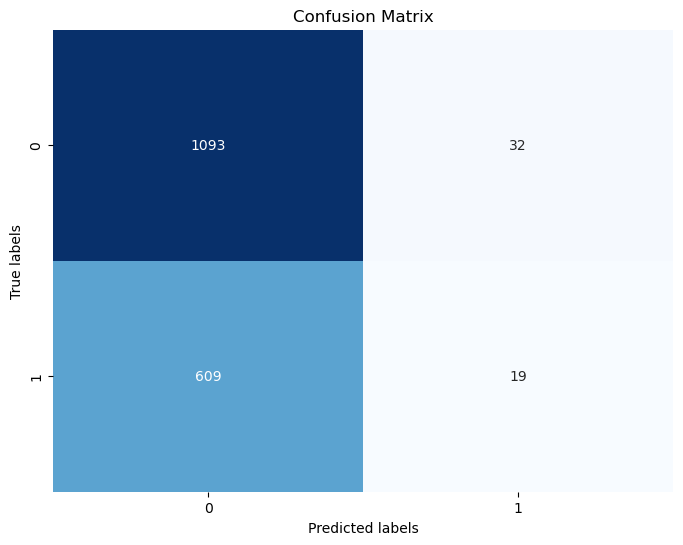

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()